<a href="https://colab.research.google.com/github/Ernesto16/AI-Saturdays/blob/master/Week6_Assessment/Linear_Classification_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Description

The dataset represents houses with 100 datapoints and several input features such as lot size, house area, build year, bathrooms, garden size, and more. Each datapoint also contains four possible output variables:

taxvalue

retailvalue

energy-eff

monument

For this task, we focus on a classification problem, where the goal is to predict energy-eff (a categorical/binary feature) based on the available input features.

To achieve this, the other output columns (taxvalue, retailvalue, and monument) are dropped, leaving only the input features as predictors and energy-eff as the target.

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chitomuzokwe","key":"067decdd68ea9148a8068a44c3dfc9f4"}'}

In [2]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

rm: cannot remove '/root/.kaggle': No such file or directory
ref                                                              title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
yashdevladdha/uber-ride-analytics-dashboard                      Uber Data Analytics Dashboard                        17324552  2025-08-08 11:13:42.920000          42349        952  1.0              
mdsultanulislamovi/student-stress-monitoring-datasets            Student Stress Monitoring Datasets                      24336  2025-07-24 16:30:01.617000          23503        396  1.0              
eshummalik/bmw-sales-dataset                                     BMW_Sales_Dataset                                      853348  2025-09-05 

In [3]:
!kaggle datasets list -s Utrecht

ref                                                title                                       size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------  ------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ictinstitute/utrecht-housing-dataset               Utrecht housing dataset                    72621  2025-01-27 10:59:56.087000           1455          9  1.0              
ictinstitute/utrecht-fairness-recruitment-dataset  Utrecht Fairness Recruitment dataset       47198  2025-03-11 10:48:35.083000           1297          6  1.0              
tamal2000/utrecht-geolocations                     Utrecht Geolocations                      232161  2019-11-13 08:47:57.227000             94          2  0.88235295       
menglugeo/utrechtroads                             utrechtroads                              100470  2020-06-23 12:50:21.500000        

In [4]:
!kaggle datasets download ictinstitute/utrecht-housing-dataset

Dataset URL: https://www.kaggle.com/datasets/ictinstitute/utrecht-housing-dataset
License(s): CC-BY-SA-4.0
  0% 0.00/70.9k [00:00<?, ?B/s]
100% 70.9k/70.9k [00:00<00:00, 228MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/utrecht-housing-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [29]:
import pandas as pd #import pandas libary

df = pd.read_csv('/content/utrechthousingsmall.csv') #read csv file
df.head(10) #view dataset

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument,select
0,150219,3528,10.7,5.2,55.6,93.60,5.2,0,2068,5055,1935,1,419000,568000,0,1,0
1,880377,3800,18.6,6.2,115.3,111.60,40.9,2,2861,5056,1927,1,539000,649000,0,1,0
2,110456,3528,12.7,5.2,66.0,117.00,5.2,0,2267,5118,1941,1,521000,716000,0,1,0
3,520728,3800,16.2,6.3,102.1,141.75,26.5,2,2615,5150,1940,1,649000,825000,0,1,0
4,881551,3800,17.6,8.1,142.6,182.25,69.7,2,2756,5359,1960,1,843000,1015000,0,1,0
5,801846,3528,12.2,8.0,97.6,144.00,8.0,0,2219,5450,1961,2,654000,845000,1,0,0
6,892303,3800,15.0,10.9,163.5,196.20,54.5,2,2504,5559,1981,1,916000,1130000,0,1,0
7,342684,3525,14.0,11.0,154.0,148.50,22.0,2,2401,5667,1986,1,717000,883000,0,0,0
8,112919,3500,15.6,6.5,101.4,146.25,29.9,1,2558,5719,1991,1,666000,772000,0,0,0
9,263115,3500,15.6,10.3,160.7,185.40,68.0,2,2558,5762,1989,2,870000,1006000,1,0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           100 non-null    int64  
 1   zipcode      100 non-null    int64  
 2   lot-len      100 non-null    float64
 3   lot-width    100 non-null    float64
 4   lot-area     100 non-null    float64
 5   house-area   100 non-null    float64
 6   garden-size  100 non-null    float64
 7   balcony      100 non-null    int64  
 8   x-coor       100 non-null    int64  
 9   y-coor       100 non-null    int64  
 10  buildyear    100 non-null    int64  
 11  bathrooms    100 non-null    int64  
 12  taxvalue     100 non-null    int64  
 13  retailvalue  100 non-null    int64  
 14  energy-eff   100 non-null    int64  
 15  monument     100 non-null    int64  
 16  select       100 non-null    int64  
dtypes: float64(5), int64(12)
memory usage: 13.4 KB


In [31]:
# Drop irrelevant and multicollinear columns
df = df.drop(columns=[
    "id", "select", "taxvalue", "retailvalue", "monument",  # outputs and id
    "x-coor", "y-coor", "lot-len", "lot-width" ,   # multicollinear features
])

In [32]:
df

,zipcode,lot-area,house-area,garden-size,balcony,buildyear,bathrooms,energy-eff
0,3528,55.6,93.60,5.2,0,1935,1,0
1,3800,115.3,111.60,40.9,2,1927,1,0
2,3528,66.0,117.00,5.2,0,1941,1,0
3,3800,102.1,141.75,26.5,2,1940,1,0
4,3800,142.6,182.25,69.7,2,1960,1,0
...,...,...,...,...,...,...,...,...
95,3525,119.9,153.00,17.9,1,2004,1,0
96,3525,73.0,98.55,7.3,0,2007,1,1
97,3528,90.3,154.80,12.9,2,1958,1,0
98,3528,131.9,196.20,12.0,2,1956,1,0


In [33]:
df["zipcode"] = df["zipcode"].astype(str)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   zipcode      100 non-null    object 
 1   lot-area     100 non-null    float64
 2   house-area   100 non-null    float64
 3   garden-size  100 non-null    float64
 4   balcony      100 non-null    int64  
 5   buildyear    100 non-null    int64  
 6   bathrooms    100 non-null    int64  
 7   energy-eff   100 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 6.4+ KB


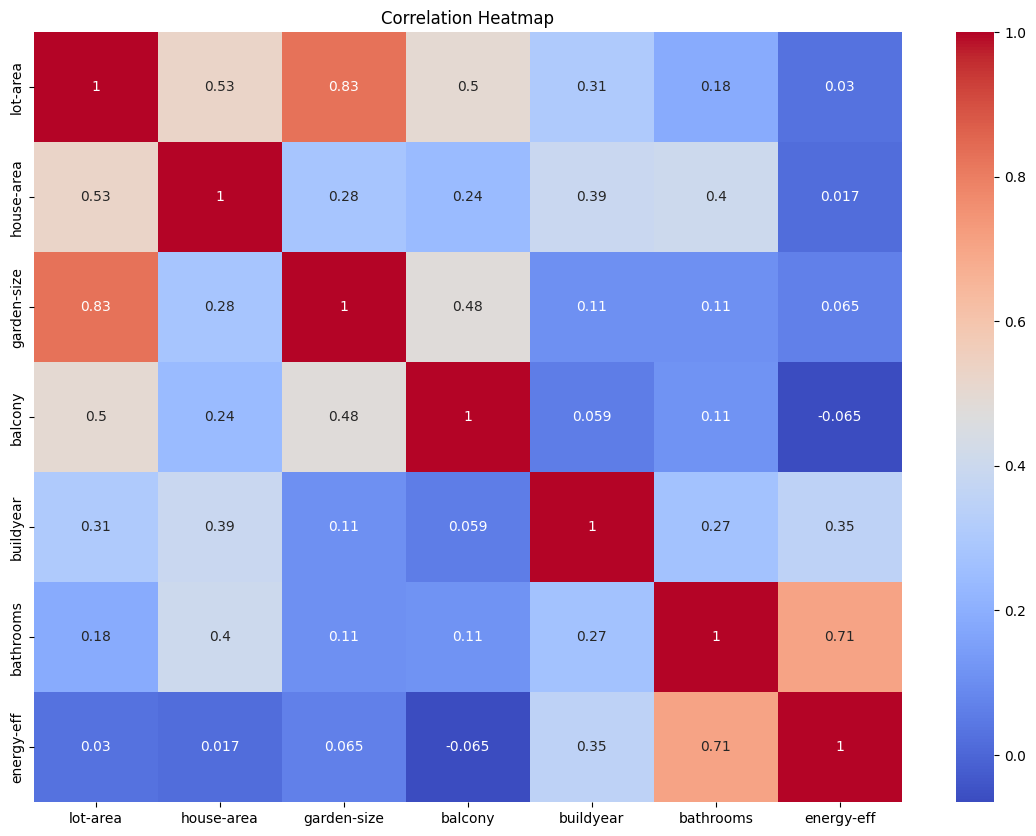

In [35]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

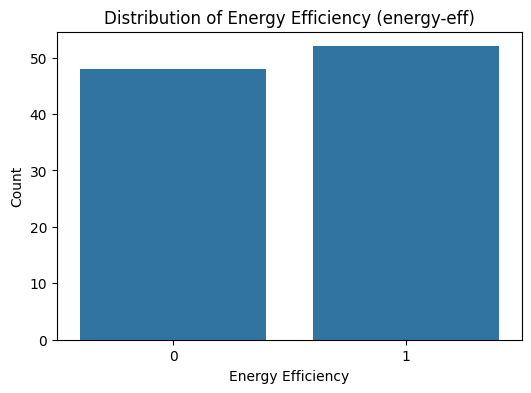

In [36]:
# see if the dataset is balanced or imbalanced
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=df["energy-eff"])
plt.title("Distribution of Energy Efficiency (energy-eff)")
plt.xlabel("Energy Efficiency")
plt.ylabel("Count")
plt.show()

In [37]:
df_class["energy-eff"].value_counts()

,count
energy-eff,
1,52
0,48


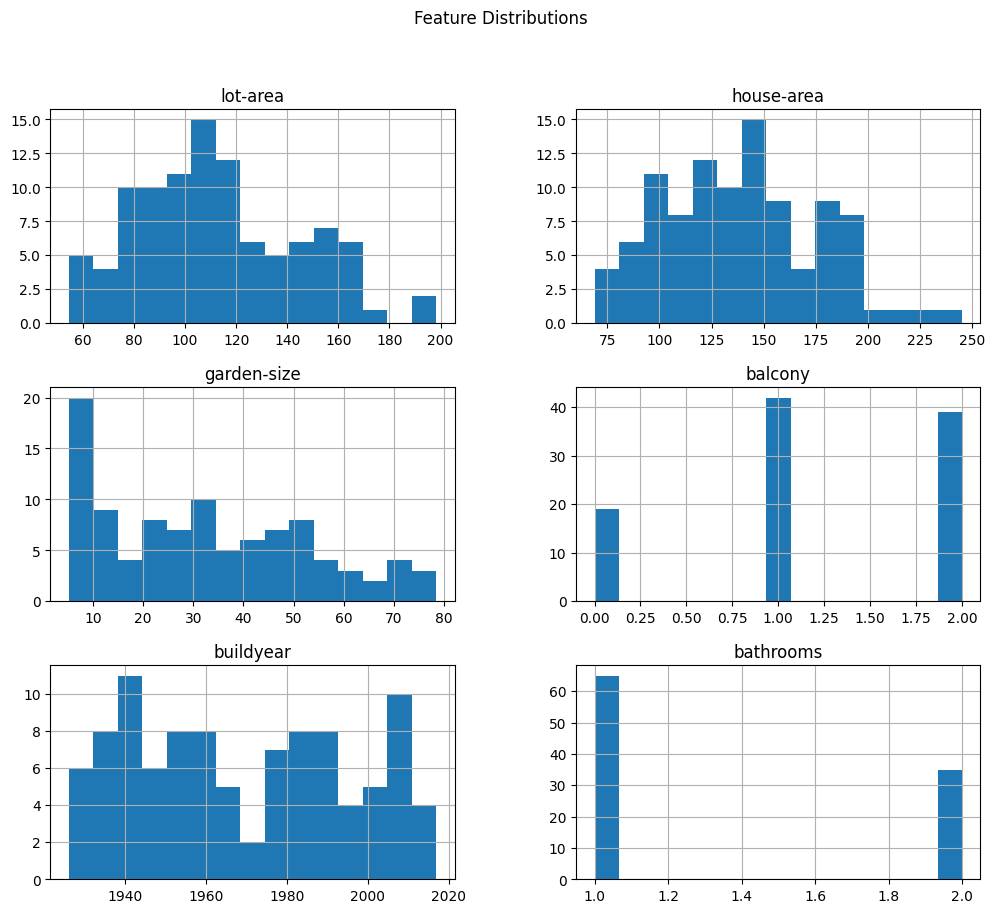

lot-area       0.457679
house-area     0.332753
garden-size    0.412010
balcony       -0.337734
buildyear      0.103783
bathrooms      0.638590
dtype: float64


In [38]:
numeric_cols = df.select_dtypes(include="number").columns.tolist()
numeric_cols.remove("energy-eff")  # Exclude target

# Histograms
df[numeric_cols].hist(figsize=(12,10), bins=15)
plt.suptitle("Feature Distributions")
plt.show()

# Skewness
print(df[numeric_cols].skew())

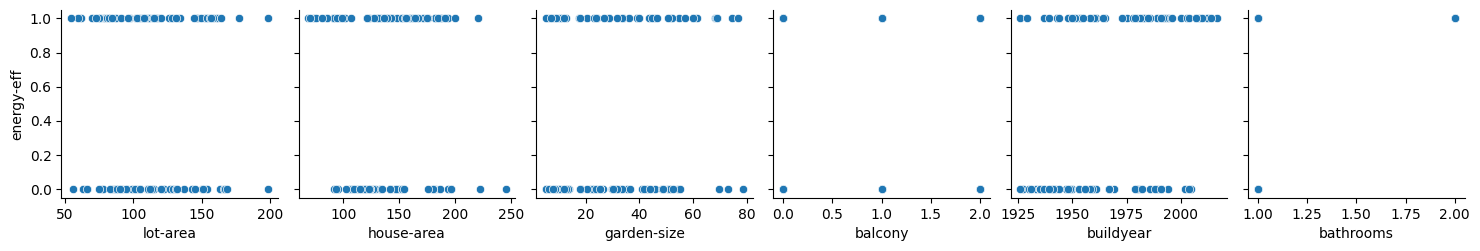

In [39]:
sns.pairplot(df, x_vars=numeric_cols, y_vars=["energy-eff"], kind="scatter")
plt.show()


In [40]:
# Make a copy to keep the original safe
df_enc = df.copy()

In [41]:
# Identify categorical/object columns (e.g., zipcode)
categorical_cols = df_enc.select_dtypes(include='object').columns.tolist()

# One-hot encode categorical columns
df_enc = pd.get_dummies(df_enc, columns=categorical_cols, drop_first=True)

# Check the result
df_enc.head()

,lot-area,house-area,garden-size,balcony,buildyear,bathrooms,energy-eff,zipcode_3525,zipcode_3528,zipcode_3800
0,55.6,93.60,5.2,0,1935,1,0,False,True,False
1,115.3,111.60,40.9,2,1927,1,0,False,False,True
2,66.0,117.00,5.2,0,1941,1,0,False,True,False
3,102.1,141.75,26.5,2,1940,1,0,False,False,True
4,142.6,182.25,69.7,2,1960,1,0,False,False,True


In [42]:
# Splitting dataset
# Target
y = df_enc["energy-eff"]

# Features (drop the target)
X = df_enc.drop(columns=["energy-eff"])

In [44]:
y

,energy-eff
0,0
1,0
2,0
3,0
4,0
...,...
95,0
96,1
97,0
98,0


In [45]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (80, 9)
Test shape: (20, 9)


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluation
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
mse_logreg = mean_squared_error(y_test, y_pred_logreg)

print(f"Logistic Regression Accuracy: {accuracy_logreg*100:.2f}%")
print(f"Logistic Regression MSE: {mse_logreg:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 95.00%
Logistic Regression MSE: 0.0500
Confusion Matrix:
 [[12  1]
 [ 0  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.88      1.00      0.93         7

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
from sklearn.svm import SVC

# Support Vector Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm*100:.2f}%")
print(f"SVM MSE: {mse_svm:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 35.00%
SVM MSE: 0.6500
Confusion Matrix:
 [[ 0 13]
 [ 0  7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.35      1.00      0.52         7

    accuracy                           0.35        20
   macro avg       0.17      0.50      0.26        20
weighted avg       0.12      0.35      0.18        20



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
print("Comparison:")
print(f"Logistic Regression Accuracy: {accuracy_logreg*100:.2f}%, MSE: {mse_logreg:.4f}")
print(f"SVM Accuracy: {accuracy_svm*100:.2f}%, MSE: {mse_svm:.4f}")

Comparison:
Logistic Regression Accuracy: 95.00%, MSE: 0.0500
SVM Accuracy: 35.00%, MSE: 0.6500


Model Comparison: Logistic Regression vs SVM

For the classification task predicting energy-eff, we compared Logistic Regression and Support Vector Machine (SVM):

Logistic Regression achieved 95% accuracy and a low MSE of 0.05, indicating it predicts the target class very well on this dataset.

SVM performed poorly, with only 35% accuracy and a high MSE of 0.65, showing that its predictions were largely incorrect.

Reason Logistic Regression is preferred:

The dataset is small (≈100 samples), which favors simpler, linear models.

Logistic Regression handles binary classification effectively without requiring feature scaling.

SVM is sensitive to small datasets and feature scales, and its default parameters did not fit this dataset well.

Conclusion: For this dataset and target, Logistic Regression is the more reliable and accurate model.